# 1.Imported package

In [112]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

-- Reading the csv file 

In [3]:
df=pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head(1) 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data cleaning

In [23]:
#copy of the data to perform the 
telco_data=df.copy()

In [27]:
telco_data["TotalCharges"]=pd.to_numeric(telco_data["TotalCharges"],errors='coerce')

In [29]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [31]:
telco_data.dropna(inplace=True)


In [32]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [33]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [34]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [43]:
dd=telco_data_dummies.copy()

In [45]:
dd.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'P

In [46]:
dd.isnull().sum()

SeniorCitizen                              0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBack

# Splitting the data

In [50]:
x=dd.drop(columns='Churn')
y=dd['Churn']

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,train_size=0.20)

# Decision tree Classifier

In [54]:
model_dt=DecisionTreeClassifier()

In [56]:
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [58]:
model_dt.score(xtest,ytest),model_dt.score(xtrain,ytrain)

(0.7403128332740846, 0.9992887624466572)

### Model is highly overfitted
#  Hyper Parameter tuning

In [59]:
param_grid = {
    'criterion': ['gini', 'entropy'],          # splitting criteria
    'max_depth': [i for i in range(2,20)],             # tree depth
    'min_samples_split': [i for i in range(2,20)],           # minimum samples required to split a node
    'min_samples_leaf': [i for i in range(2,20)]              # minimum samples required at a leaf node
}

In [63]:
grid_search=GridSearchCV(model_dt,
    param_grid,
    scoring='accuracy',
    n_jobs=-1,
    refit=True,
    cv=5,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=np.nan,
    return_train_score=False,
)

In [78]:
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]},
             scoring='accuracy')

# Tuned Model

In [66]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=14)


In [74]:
model_dt=DecisionTreeClassifier(max_depth=9, min_samples_leaf=14)

In [80]:
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=14)

In [87]:
print("Test score:",model_dt.score(xtest,ytest),' ,Traning Score:',model_dt.score(xtrain,ytrain))

Test score: 0.7868823320298614  ,Traning Score: 0.8442389758179232


In [93]:
ypreg=model_dt.predict(xtest)

# Confusion matrix

<Axes: >

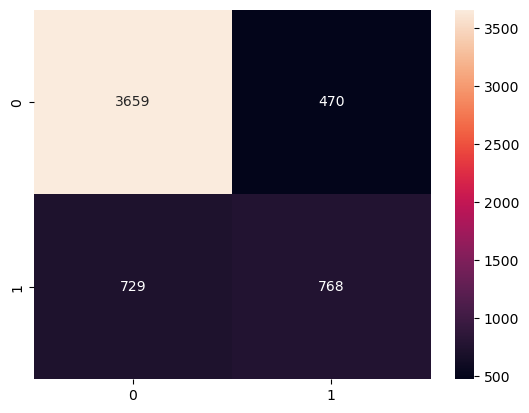

In [98]:
sns.heatmap(confusion_matrix(ytest,ypreg),annot=True,fmt='d')

# Classification report

In [97]:
print(classification_report(ytest,ypreg))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4129
           1       0.62      0.51      0.56      1497

    accuracy                           0.79      5626
   macro avg       0.73      0.70      0.71      5626
weighted avg       0.78      0.79      0.78      5626



# Resampling 

In [99]:
sn=SMOTEENN()

In [100]:
x_resampled,y_resampled=sn.fit_resample(x,y)

In [101]:
xtrain,xtest,ytrain,ytest=train_test_split(x_resampled,y_resampled,random_state=10,train_size=0.20)

In [102]:
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]},
             scoring='accuracy')

In [103]:
dt_resampled_model=DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,min_samples_split=8)

In [104]:
dt_resampled_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=8)

In [105]:
ypregRe=dt_resampled_model.predict(xtest)

<Axes: >

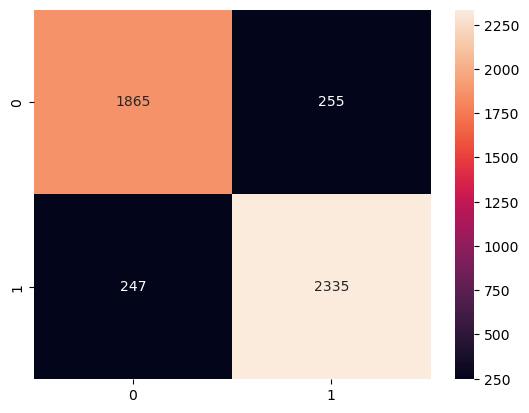

In [107]:
sns.heatmap(confusion_matrix(ytest,ypregRe),annot=True,fmt='d')

In [109]:
print(classification_report(ytest,ypregRe))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2120
           1       0.90      0.90      0.90      2582

    accuracy                           0.89      4702
   macro avg       0.89      0.89      0.89      4702
weighted avg       0.89      0.89      0.89      4702



In [110]:
print("Test score:",dt_resampled_model.score(xtest,ytest),' ,Traning Score:',dt_resampled_model.score(xtrain,ytrain))

Test score: 0.893236920459379  ,Traning Score: 0.963404255319149


# Random Forest  


In [ ]:
param_grid_rt = {
    'n_estimators':[x for x in range(100, 301, 100)] ,
    'max_depth': [x for x in range(5, 21, 5)],
    'min_samples_split': [x for x in range(2, 6)],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
grid_search = GridSearchCV(
    estimator=rd,
    param_grid=param_grid,
    scoring='recall',   # or 'f1', 'accuracy'
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 11664 candidates, totalling 58320 fits


In [113]:
rd=RandomForestClassifier().fit(xtrain,ytrain)

In [114]:
print("Test score:",rd.score(xtest,ytest),' ,Traning Score:',rd.score(xtrain,ytrain))

Test score: 0.942577626541897  ,Traning Score: 1.0


In [ ]:
print(classification_report(ytest,ypregRe))